<a href="https://colab.research.google.com/github/evarahma61/Sentiment-Analysis-Twitter/blob/main/Complement%20Naive%20Bayes%20(Labelling%20InSet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import string
import re
import nltk
import pickle
import numpy as np

In [ ]:
from google.colab import files
data_files = files.upload()

Saving labeled_sesungguhnya.csv to labeled_sesungguhnya.csv


In [ ]:
dataset_label = pd.read_csv('labeled_sesungguhnya.csv', encoding = "ISO-8859-1")

In [ ]:
dataset_label.info()

In [ ]:
dataset_label

,content
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m..."
...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...


#Preprocessing

##1. Preprocessing : Cleaning

In [ ]:
import re
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
  text = re.sub(r"http\S+", "", text) # menghilangkan URL gambar
  text = re.sub('@[^\s]+','',text) # menghilangkan mention username dalam tweets
  text = re.sub("@[A-Za-z0-9]+","",text) #menghilangkan mention username dalam tweets
  text = re.sub('[^A-Za-z]+', ' ', text) #menghilangkan simbol dan karakter spesial yang bukan
  return text
# Cleaning the text in the review column
dataset_label['cleaning'] = dataset_label['content'].apply(clean) #membuat kolom baru yang bernama 


In [ ]:
dataset_label

,content,cleaning
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...
...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...


## 2. Preprocessing : Case Folding

In [ ]:
def case_folding(text): # Removes all special characters and numericals leaving the alphabets
  text = text.lower() #lowercase) #mengubah ke lowercase semua
  return text
# Cleaning the text in the review column
dataset_label['case_folding'] = dataset_label['cleaning'].apply(case_folding) 
#membuat kolom baru yang bernama case_folding

In [ ]:
dataset_label

,content,cleaning,case_folding
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...
...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...


##3. Preprocessing : Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def tokenization(text):
  text = word_tokenize(text)
  return text
dataset_label['tokenization'] = dataset_label['case_folding'].apply(tokenization) 


In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga..."
...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me..."


##4. Preprocessing : Normalization

In [ ]:
from google.colab import files
kamus = files.upload()

Saving kamus.xlsx to kamus.xlsx


In [ ]:
import pandas as pd
slang = pd.read_excel('kamus.xlsx')

In [ ]:
normalisasi = {}

for index, row in slang.iterrows():
  if row[0] not in normalisasi:
    normalisasi[row[0]] = row[1]


def normalized_term(document):
    return [normalisasi[term] if term in normalisasi else term for term in document]

dataset_label['normalization'] = dataset_label['tokenization'].apply(normalized_term)

In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga..."
...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me..."


##5. Preprocessing : Stopword Removal

In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
list_stopwords = stopwords.words('indonesian')

In [ ]:
print(set(list_stopwords))

{'diakhiri', 'tetap', 'sekurangnya', 'tiap', 'umum', 'bisakah', 'sebisanya', 'inikah', 'kiranya', 'berbagai', 'terjadi', 'pasti', 'pernah', 'agak', 'pada', 'balik', 'tersampaikan', 'mempersoalkan', 'ditanya', 'diantaranya', 'ingat', 'tengah', 'terhadap', 'apalagi', 'lima', 'di', 'sedikitnya', 'pula', 'keterlaluan', 'selanjutnya', 'belakangan', 'mengenai', 'rasa', 'diperkirakan', 'artinya', 'bagi', 'seharusnya', 'ikut', 'lanjut', 'sempat', 'kelamaan', 'mengibaratkannya', 'agaknya', 'jelaskan', 'bakal', 'memerlukan', 'kemungkinannya', 'berikan', 'berkehendak', 'adalah', 'diperbuat', 'diucapkannya', 'jumlahnya', 'sampaikan', 'dijelaskan', 'kitalah', 'pertanyakan', 'diperbuatnya', 'saya', 'tentang', 'menunjukkan', 'buat', 'ungkap', 'sangatlah', 'memang', 'sendirian', 'antar', 'bahwa', 'se', 'sekaligus', 'sepantasnya', 'waduh', 'berlainan', 'bapak', 'tentu', 'turut', 'sejenak', 'menyebutkan', 'sebagai', 'maka', 'wahai', 'segala', 'mana', 'menuju', 'seenaknya', 'semata', 'diri', 'pastilah', 

In [ ]:
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

In [ ]:
from google.colab import files
daftar_stopword = files.upload()

Saving daftar_stopwords.txt to daftar_stopwords.txt


In [ ]:
# read txt stopword using pandas
txt_stopword = pd.read_csv("daftar_stopwords.txt", names= ["stopwords"], header = None)

In [ ]:
# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

In [ ]:
# convert list to dictionary
list_stopwords = set(list_stopwords)

In [ ]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

dataset_label['stopword_removed'] = dataset_label['normalization'].apply(stopwords_removal) 

In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization,stopword_removed
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[vaksin, astrazeneca, menyebabkan, infeksi, ad..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga...","[dnj, desember, indonesia, mengamankan, dosis,..."
...,...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, j..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, menerima, vaks..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me..."


## 6. Preprocessing : Stemmer

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 30.1 MB/s 


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [ ]:
# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}


In [ ]:
for document in dataset_label['stopword_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

In [ ]:
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


Output streaming akan dipotong hingga 5000 baris terakhir.
daftarnya : daftar
murah : murah
ayo : ayo
semangat : semangat
wajar : wajar
normal : normal
efek : efek
meriang : meriang
sehari : hari
doang : doang
bismillah : bismillah
lancar : lancar
mei : mei
pembahasan : bahas
internet : internet
efektivitas : efektivitas
akses : akses
silakan : sila
cari : cari
tensi : tensi
parasetamol : parasetamol
berjaga : jaga
ambil : ambil
selamat : selamat
kuat : kuat
sip : sip
dengar : dengar
pertimbangan : timbang
masuk : masuk
maju : maju
masyarakat : masyarakat
beruntung : untung
terima : terima
kasih : kasih
informasinya : informasi
dikaruniai : karunia
kesehatan : sehat
dilindungi : lindung
allah : allah
wabah : wabah
iparku : ipar
eh : eh
positif : positif
merek : merek
apapun : apa
kena : kena
separah : parah
berdekatan : dekat
untungnya : untung
parah : parah
sesak : sesak
pure : pure
demam : demam
kehilangan : hilang
penciuman : cium
sembuh : sembuh
aktif : aktif
mending : mending
efek

In [ ]:
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

dataset_label['stemming'] = dataset_label['stopword_removed'].apply(get_stemmed_term)

In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization,stopword_removed,stemming
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit...","[jenis, vaksin, sesuai, stok, bagus, tulis, va..."
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st...","[sinovac, sinopharm, astrazeneca, eua, who, st..."
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen...","[sesal, deh, vaksin, gue, sinovac, astrazeneca..."
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[vaksin, astrazeneca, menyebabkan, infeksi, ad...","[vaksin, astrazeneca, sebab, infeksi, adenovir..."
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga...","[dnj, desember, indonesia, mengamankan, dosis,...","[dnj, desember, indonesia, aman, dosis, vaksin..."
...,...,...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[duga, picu, mati, efek, kipi, vaksin, astraze..."
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, j...","[indonesia, datang, vaksin, astrazeneca, juta,..."
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, menerima, vaks...","[kamis, malam, juni, indonesia, terima, vaksin..."
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, bukti, turun..."


# Label Otomatis Menggunakan Kamus Lexicon Inset

In [ ]:
from google.colab import files
negative = files.upload()

Saving lexicon_negative.xlsx to lexicon_negative.xlsx


In [ ]:
import pandas as pd
lex_negative = pd.read_excel('lexicon_negative.xlsx')

In [ ]:
from google.colab import files
positive = files.upload()

Saving lexicon_positive.xlsx to lexicon_positive.xlsx


In [ ]:
import pandas as pd
lex_positive = pd.read_excel('lexicon_positive.xlsx')

In [ ]:
pos = {}
for index, row in lex_positive.iterrows():
  if row[0] not in pos:
    pos[row[0]] = row[1]


neg = {}
for index, row in lex_negative.iterrows():
  if row[0] not in neg:
    neg[row[0]] = row[1]

In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in pos):
            score = score + pos[word]
    for word in text:
        if (word in neg):
            score = score + neg[word]
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
results = dataset_label['stemming'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
dataset_label['polarity_score'] = results[0]
dataset_label['polarity'] = results[1]
print(dataset_label['polarity'].value_counts())

# Export to csv file

negative    1830
positive    1275
Name: polarity, dtype: int64


In [ ]:
dataset_label = dataset_label[dataset_label.polarity_score != 0]

# Perbandingan

In [ ]:
dataset_label['polarity'].value_counts()

negative    1830
positive    1275
Name: polarity, dtype: int64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

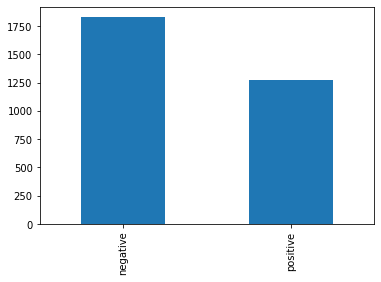

In [ ]:
label_bar_chart = dataset_label['polarity'].value_counts()
label_bar_chart.plot(kind='bar');

In [ ]:
dataset_label["final"] = [' '.join(map(str, l)) for l in dataset_label['stemming']]

In [ ]:
dataset_label


,content,cleaning,case_folding,tokenization,normalization,stopword_removed,stemming,polarity_score,polarity,final
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit...","[jenis, vaksin, sesuai, stok, bagus, tulis, va...",-4,negative,jenis vaksin sesuai stok bagus tulis vaksin as...
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st...","[sinovac, sinopharm, astrazeneca, eua, who, st...",4,positive,sinovac sinopharm astrazeneca eua who standar ...
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen...","[sesal, deh, vaksin, gue, sinovac, astrazeneca...",2,positive,sesal deh vaksin gue sinovac astrazeneca efektif
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[vaksin, astrazeneca, menyebabkan, infeksi, ad...","[vaksin, astrazeneca, sebab, infeksi, adenovir...",-5,negative,vaksin astrazeneca sebab infeksi adenovirus co...
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga...","[dnj, desember, indonesia, mengamankan, dosis,...","[dnj, desember, indonesia, aman, dosis, vaksin...",4,positive,dnj desember indonesia aman dosis vaksin covid...
...,...,...,...,...,...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[duga, picu, mati, efek, kipi, vaksin, astraze...",1,positive,duga picu mati efek kipi vaksin astrazeneca ke...
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, j...","[indonesia, datang, vaksin, astrazeneca, juta,...",-2,negative,indonesia datang vaksin astrazeneca juta dosis
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, menerima, vaks...","[kamis, malam, juni, indonesia, terima, vaksin...",-3,negative,kamis malam juni indonesia terima vaksin astra...
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, bukti, turun...",-6,negative,good news vaksin astrazeneca bukti turun risik...


#TF-IDF

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
polarity_encode = {'negative' : 1, 'positive' : 0}
dataset_label['new_polarity'] = dataset_label['polarity'].map(polarity_encode).values


In [ ]:
dataset_label

,content,cleaning,case_folding,tokenization,normalization,stopword_removed,stemming,polarity_score,polarity,final,new_polarity
0,""" Jenis vaksin menyesuaikan stok "" Bagus ni g ...",Jenis vaksin menyesuaikan stok Bagus ni g dit...,jenis vaksin menyesuaikan stok bagus ni g dit...,"[jenis, vaksin, menyesuaikan, stok, bagus, ni,...","[jenis, vaksin, menyesuaikan, stok, bagus, nih...","[jenis, vaksin, menyesuaikan, stok, bagus, dit...","[jenis, vaksin, sesuai, stok, bagus, tulis, va...",-4,negative,jenis vaksin sesuai stok bagus tulis vaksin as...,1
1,"""Mau Sinovac, Sinopharm, AstraZeneca, itu suda...",Mau Sinovac Sinopharm AstraZeneca itu sudah m...,mau sinovac sinopharm astrazeneca itu sudah m...,"[mau, sinovac, sinopharm, astrazeneca, itu, su...","[mau, sinovac, sinopharm, astrazeneca, itu, su...","[sinovac, sinopharm, astrazeneca, eua, who, st...","[sinovac, sinopharm, astrazeneca, eua, who, st...",4,positive,sinovac sinopharm astrazeneca eua who standar ...,0
2,"""nyesel deh vaksin gue sinovac, bukan astrazen...",nyesel deh vaksin gue sinovac bukan astrazene...,nyesel deh vaksin gue sinovac bukan astrazene...,"[nyesel, deh, vaksin, gue, sinovac, bukan, ast...","[menyesal, deh, vaksin, gue, sinovac, bukan, a...","[menyesal, deh, vaksin, gue, sinovac, astrazen...","[sesal, deh, vaksin, gue, sinovac, astrazeneca...",2,positive,sesal deh vaksin gue sinovac astrazeneca efektif,0
3,"Jadi, vaksin Astrazeneca tidak bisa menyebabka...",Jadi vaksin Astrazeneca tidak bisa menyebabkan...,jadi vaksin astrazeneca tidak bisa menyebabkan...,"[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[jadi, vaksin, astrazeneca, tidak, bisa, menye...","[vaksin, astrazeneca, menyebabkan, infeksi, ad...","[vaksin, astrazeneca, sebab, infeksi, adenovir...",-5,negative,vaksin astrazeneca sebab infeksi adenovirus co...,1
4,"#DNJ\n\nSejak Desember 2020, Indonesia terus m...",DNJ Sejak Desember Indonesia terus mengamanka...,dnj sejak desember indonesia terus mengamanka...,"[dnj, sejak, desember, indonesia, terus, menga...","[dnj, sejak, desember, indonesia, terus, menga...","[dnj, desember, indonesia, mengamankan, dosis,...","[dnj, desember, indonesia, aman, dosis, vaksin...",4,positive,dnj desember indonesia aman dosis vaksin covid...,0
...,...,...,...,...,...,...,...,...,...,...,...
3100,"Diduga Picu Kematian, Efek KIPI Vaksin AstraZe...",Diduga Picu Kematian Efek KIPI Vaksin AstraZen...,diduga picu kematian efek kipi vaksin astrazen...,"[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[diduga, picu, kematian, efek, kipi, vaksin, a...","[duga, picu, mati, efek, kipi, vaksin, astraze...",1,positive,duga picu mati efek kipi vaksin astrazeneca ke...,0
3101,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,Indonesia Kedatangan Vaksin AstraZeneca Lagi S...,indonesia kedatangan vaksin astrazeneca lagi s...,"[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, l...","[indonesia, kedatangan, vaksin, astrazeneca, j...","[indonesia, datang, vaksin, astrazeneca, juta,...",-2,negative,indonesia datang vaksin astrazeneca juta dosis,1
3102,"Kamis malam, 10 Juni 2021, Indonesia kembali ...",Kamis malam Juni Indonesia kembali menerima va...,kamis malam juni indonesia kembali menerima va...,"[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, kembali, mener...","[kamis, malam, juni, indonesia, menerima, vaks...","[kamis, malam, juni, indonesia, terima, vaksin...",-3,negative,kamis malam juni indonesia terima vaksin astra...,1
3103,GOOD NEWS!!\n\nVaksin AstraZeneca terbukti men...,GOOD NEWS Vaksin AstraZeneca terbukti menurunk...,good news vaksin astrazeneca terbukti menurunk...,"[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, terbukti, me...","[good, news, vaksin, astrazeneca, bukti, turun...",-6,negative,good news vaksin astrazeneca bukti turun risik..

# Naive Bayes

In [ ]:
pipeline_mnb = Pipeline([
                         ('vect', CountVectorizer()), 
                         ('tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)),
                         ('clf', ComplementNB(alpha=1))
])
X_train, X_test, y_train, y_test = train_test_split(dataset_label['final'], dataset_label['new_polarity'], test_size=0.2, random_state = 0)
pipeline_mnb.fit(X_train, y_train)
predictions = pipeline_mnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

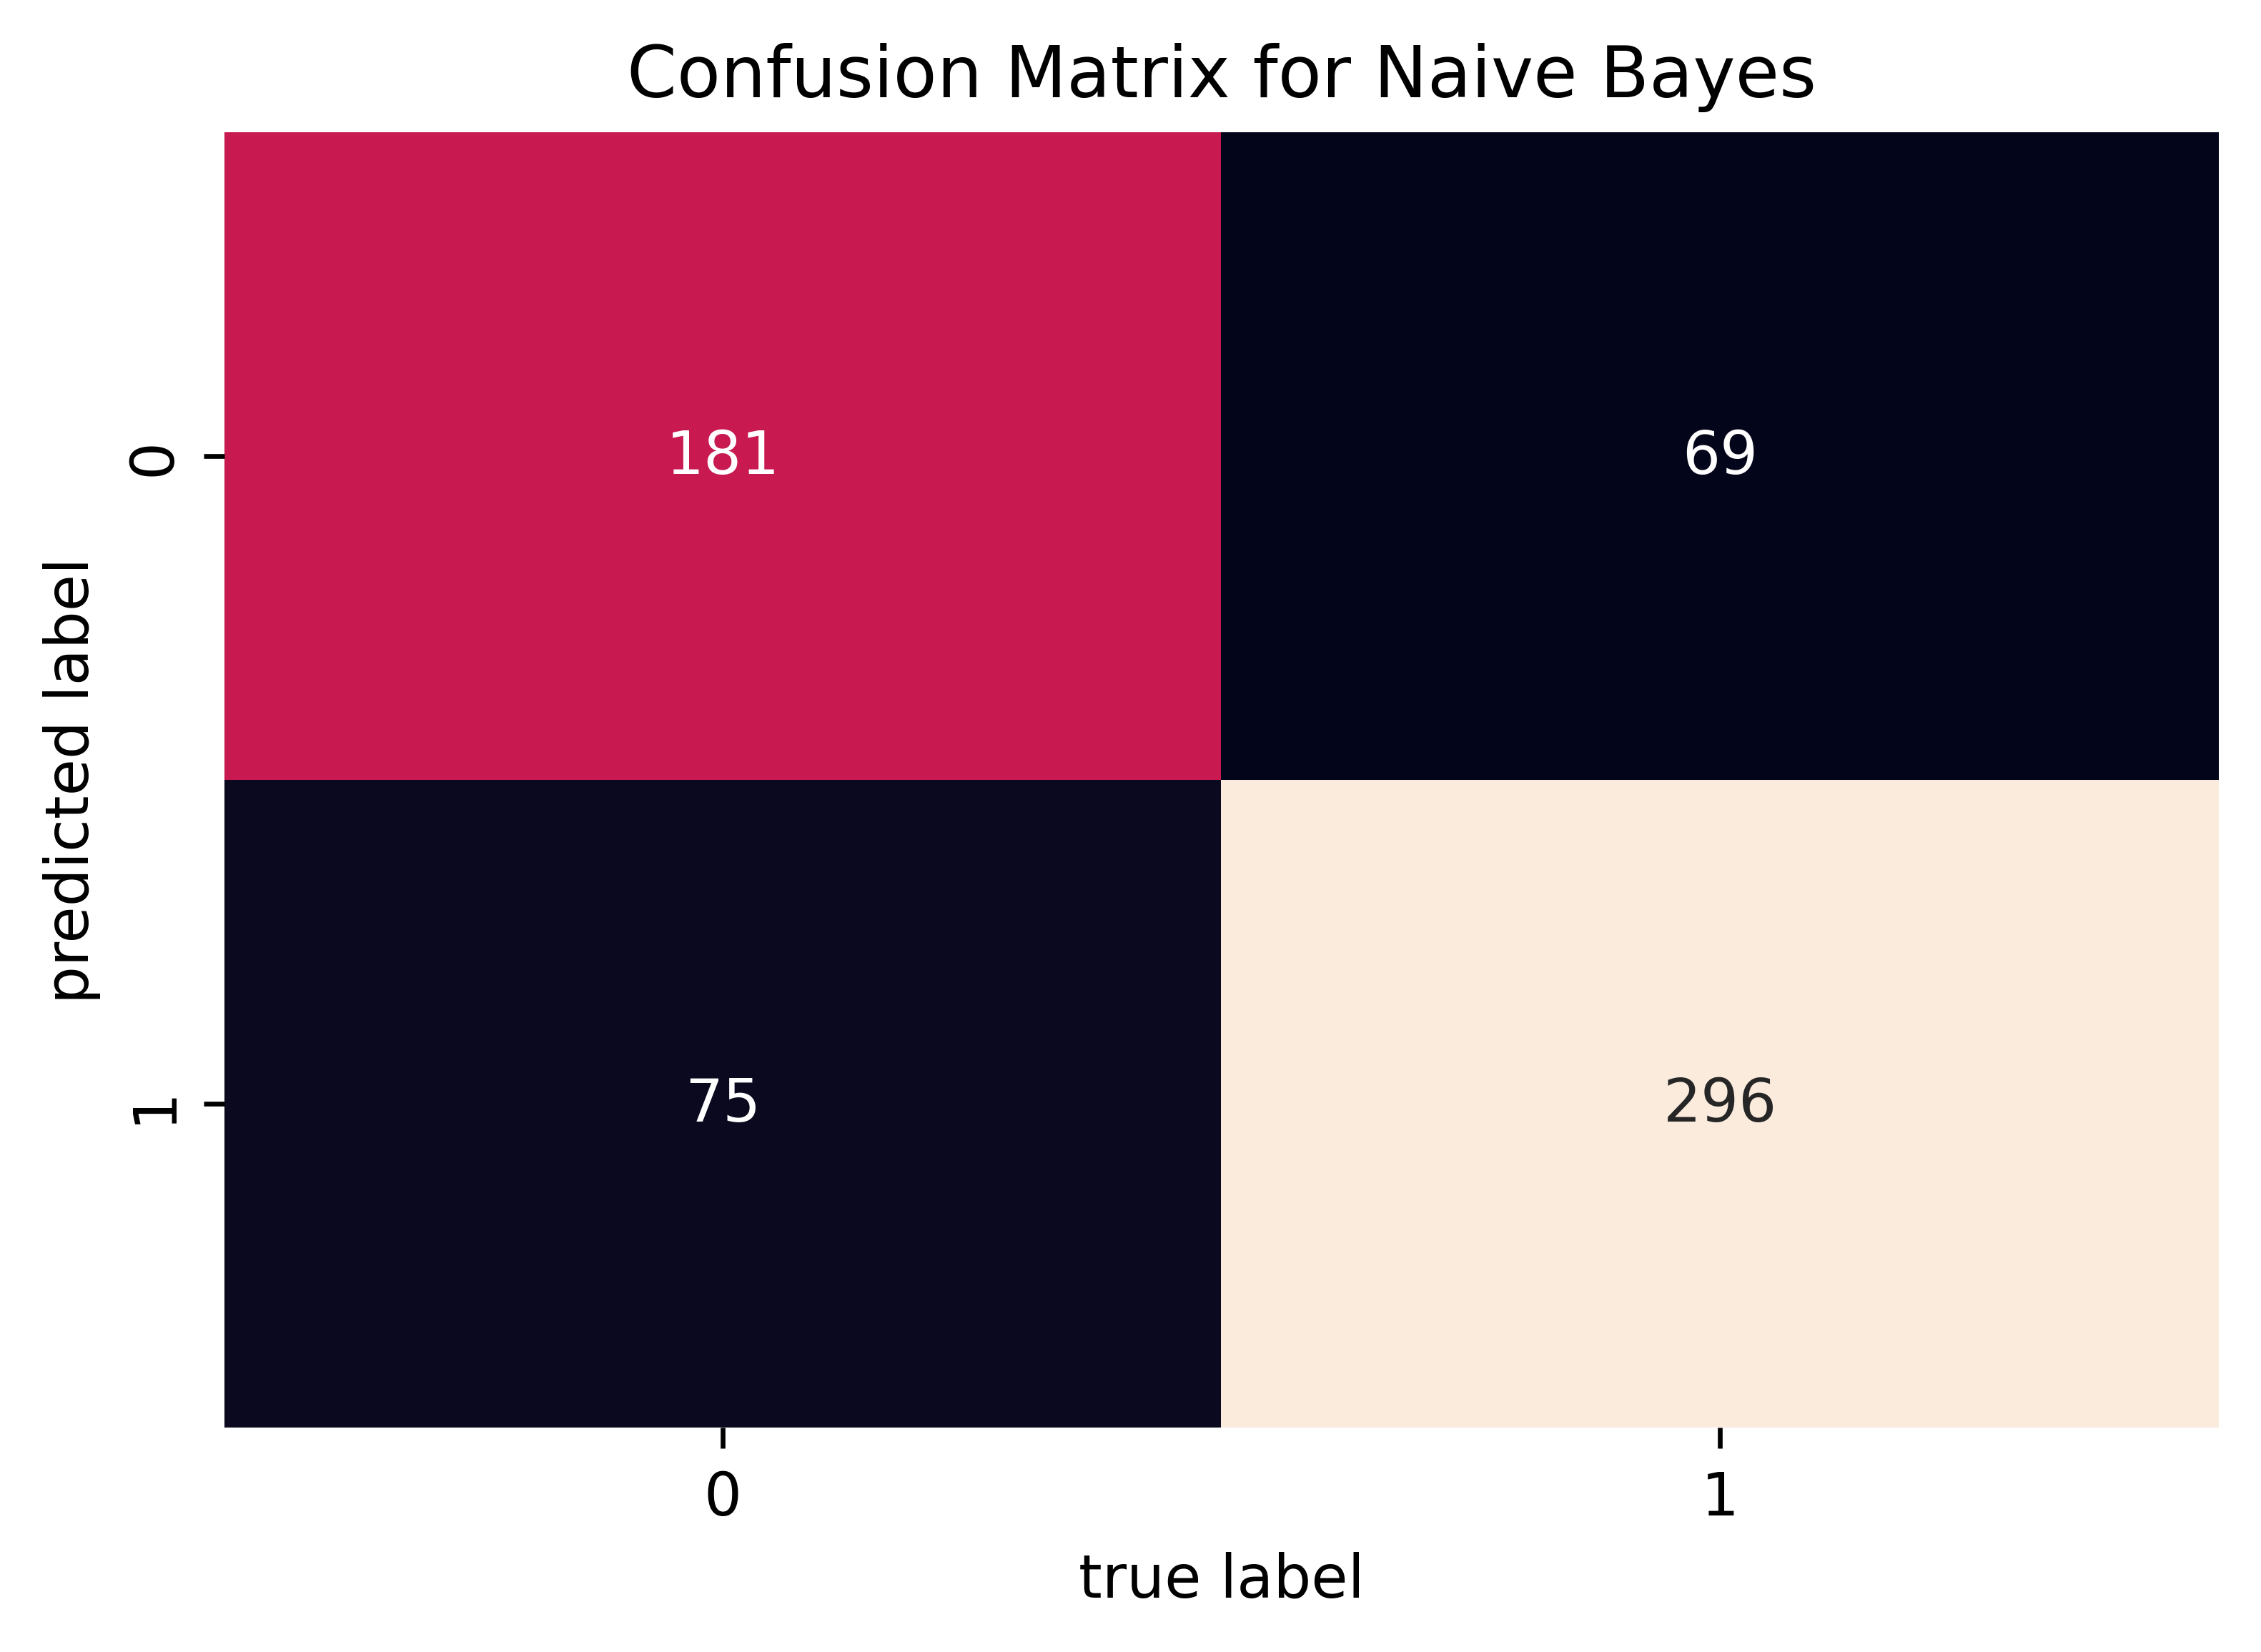

In [ ]:
plt.figure(dpi=600)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)


plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("confusion_matrix.png")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predictions, y_test)
print("Accuracy with Naive-Bayes: ", score_naive)


Accuracy with Naive-Bayes:  0.7681159420289855


## Classification Matrices

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72       256
           1       0.80      0.81      0.80       365

    accuracy                           0.77       621
   macro avg       0.76      0.76      0.76       621
weighted avg       0.77      0.77      0.77       621



## K-Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline_mnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79116466 0.79518072 0.75100402 0.80722892 0.77419355 0.81854839
 0.7983871  0.79032258 0.81048387 0.8266129 ]


In [ ]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7963


##Test Data Baru

In [ ]:
test_sentence = "alhamdulillah sudah vaksin astrazeneca"

In [ ]:
model_input = pipeline_mnb.predict([test_sentence])

In [ ]:
print(model_input)

[0]
